In [1]:
from sklearn.preprocessing import normalize
from utils import get_study_metrics_data, min_max_scale_dataframe
import pandas as pd
from scipy.stats import kstest, stats, anderson_ksamp, ksone, anderson
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#studies_to_exclude = ['neurocube_quiroga_easy2', 'synth_mearec_neuronexus_noise10_K20_C32', 'neurocube_quiroga_easy1', 'neurocube_quiroga_difficult1', 'mea_c30', 'paired_monotrode_boyden32c', 'neurocube_sim2_11K20', 'paired_monotrode_mea64c', 'paired_english', 'synth_mearec_neuronexus_noise20_K40_C32', 'neurocube_quiroga_difficult2', 'paired_crcns', 'paired_monotrode_kampff', 'synth_mearec_neuronexus_noise20_K20_C32', 'synth_mearec_neuronexus_noise20_K10_C32', 'paired_kampff', 'paired_monotrode_crcns', 'synth_mearec_neuronexus_noise10_K10_C32', 'neurocube_sim2_2K10', 'paired_boyden32c', 'paired_mea64c', 'synth_mearec_neuronexus_noise10_K40_C32']
#ALL_AVAILABLE_STUDY_SETS=['HYBRID_JANELIA', 'LONG_DRIFT', 'LONG_STATIC', 'MANUAL_FRANKLAB', 'PAIRED_BOYDEN', 'PAIRED_CRCNS_HC1', 'PAIRED_ENGLISH', 'PAIRED_KAMPFF', 'PAIRED_MEA64C_YGER', 'PAIRED_MONOTRODE', 'SYNTH_BIONET', 'SYNTH_MAGLAND', 'SYNTH_MEAREC_NEURONEXUS', 'SYNTH_MEAREC_TETRODE', 'SYNTH_MONOTRODE', 'SYNTH_VISAPY']
#STUDY_NAMES = [study_name for study_set_name in ['HYBRID_JANELIA', 'LONG_STATIC', 'SYNTH_MAGLAND', 'SYNTH_MEAREC_TETRODE'] for study_name in SFStudySet.load(study_set_name).get_study_names() if study_name not in studies_to_exclude]

# Hybrid Janelia static only (no drift)
STUDY_NAMES = ['hybrid_static_tetrode', 'hybrid_static_siprobe',
               'LONG_STATIC_1200s_8c', 'LONG_STATIC_600s_8c', 'LONG_STATIC_300s_16c', 'LONG_STATIC_4800s_16c',
               'LONG_STATIC_300s_8c', 'LONG_STATIC_2400s_8c', 'LONG_STATIC_2400s_16c', 'LONG_STATIC_600s_16c',
               'LONG_STATIC_1200s_16c', 'LONG_STATIC_4800s_8c', 'synth_magland_noise20_K20_C8',
               'synth_magland_noise10_K10_C4', 'synth_magland_noise10_K10_C8', 'synth_magland_noise20_K10_C4',
               'synth_magland_noise20_K20_C4', 'synth_magland_noise20_K10_C8', 'synth_magland_noise10_K20_C8',
               'synth_magland_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K10_C4',
               'synth_mearec_tetrode_noise20_K10_C4', 'synth_mearec_tetrode_noise20_K20_C4']

STATIC_SIPROBE_STUDY_NAMES = ['hybrid_static_siprobe', 'LONG_STATIC_1200s_8c', 'LONG_STATIC_600s_8c', 'LONG_STATIC_300s_16c',
                       'LONG_STATIC_4800s_16c', 'LONG_STATIC_300s_8c', 'LONG_STATIC_2400s_8c', 'LONG_STATIC_2400s_16c',
                       'LONG_STATIC_600s_16c', 'LONG_STATIC_1200s_16c', 'LONG_STATIC_4800s_8c',]

STATIC_TETRODE_STUDY_NAMES = ['hybrid_static_tetrode', 'synth_magland_noise20_K20_C8', 'synth_magland_noise10_K10_C4',
                       'synth_magland_noise10_K10_C8', 'synth_magland_noise20_K10_C4', 'synth_magland_noise20_K20_C4',
                       'synth_magland_noise20_K10_C8', 'synth_magland_noise10_K20_C8', 'synth_magland_noise10_K20_C4',
                       'synth_mearec_tetrode_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K10_C4',
                       'synth_mearec_tetrode_noise20_K10_C4', 'synth_mearec_tetrode_noise20_K20_C4']

METRIC_NAMES = [ "firing_rate", "presence_ratio", "isi_violation",
                 "amplitude_cutoff", "snr", "max_drift", "cumulative_drift",
                 "silhouette_score", "isolation_distance", "l_ratio",
                 "nn_hit_rate", "nn_miss_rate", "d_prime"]

SORTER_NAMES = ['herdingspikes2', 'ironclust', 'jrclust',
               'kilosort', 'kilosort2', 'klusta', 'mountainsort4',
               'spykingcircus', 'tridesclous']

# SORTER_NAMES = ['ironclust', 'jrclust',
#                 'kilosort2', 'klusta', 'mountainsort4',
#                 'spykingcircus', 'tridesclous']

RANDOM_STATE = 0
P_VALUE = 0.01

In [3]:
static_tetrode_metric_data = get_study_metrics_data(
        study_names=STATIC_TETRODE_STUDY_NAMES,
        metric_names=METRIC_NAMES,
        random_state=RANDOM_STATE,
        sorter_names=SORTER_NAMES,
        transformation=lambda x: pd.DataFrame(normalize(x.to_numpy(), axis=0), columns=x.columns),
        # include_meta=True,
        by_sorter=True
    )

In [10]:
# metric_kl_pvalues = {}
#
# for metric_name in METRIC_NAMES:
#     pvalues = pd.DataFrame(index=SORTER_NAMES, columns=SORTER_NAMES)
#     for sorter_name_A in SORTER_NAMES:
#         for sorter_name_B in SORTER_NAMES:
#             pvalues[sorter_name_A][sorter_name_B] = kstest(static_tetrode_metric_data[sorter_name_A][metric_name], static_tetrode_metric_data[sorter_name_B][metric_name])[1]
#
#     metric_kl_pvalues[metric_name] = pvalues

In [28]:
# distribution and distributions of all other sorter metrics.
#MIGHT BE INTERPRETING THE P VALUES THE WRONG WAY ROUND DOUBLE CHECK THIS
#If the mean and std var are estimated then the pvalues are invalid
# https://stackoverflow.com/questions/7903977/implementing-a-kolmogorov-smirnov-test-in-python-scipy

pvalues = pd.DataFrame(index=SORTER_NAMES, columns=METRIC_NAMES, dtype='float')
for i, sorter_name in enumerate(SORTER_NAMES):
    current_sorter = static_tetrode_metric_data[sorter_name]
    other_sorters = pd.concat(df for name, df in static_tetrode_metric_data.items() if name != sorter_name)
    for j, metric_name in enumerate(METRIC_NAMES):
        # critical_value = ksone.ppf(1-P_VALUE, current_sorter.shape[0])
        statistic, p_value = kstest(current_sorter[metric_name], other_sorters[metric_name])
        if p_value < P_VALUE:
            pvalues.loc[sorter_name][metric_name] = p_value


In [1]:
critical_value_indices = {0.25: 0, 0.10: 1, 0.05: 2, 0.025: 3, 0.01: 4, 0.005: 5, 0.001: 6}

anderson_df = pd.DataFrame(index=SORTER_NAMES, columns=METRIC_NAMES, dtype='float')

for sorter_name in SORTER_NAMES:
    current_sorter = static_tetrode_metric_data[sorter_name]
    other_sorters = pd.concat(df for name, df in static_tetrode_metric_data.items() if name != sorter_name)
    for metric_name in METRIC_NAMES:
        test_statistic, critical_values, significance_level = anderson_ksamp([other_sorters[metric_name], current_sorter[metric_name]])
        # If the estimated p_value is smaller than the P_VALUE defined above, accept it.
        if  test_statistic > critical_values[critical_value_indices[P_VALUE]]:
            anderson_df.loc[sorter_name][metric_name] = test_statistic
            # print(test_statistic, critical_values, significance_level)

NameError: name 'pd' is not defined

In [31]:
is_gaussian = pd.Series(index=METRIC_NAMES, dtype='float')

df = pd.concat([df for df in static_tetrode_metric_data.values()])
for metric_name in METRIC_NAMES:
    test_statistic, critical_values, significance_levels = anderson(df[metric_name], 'norm')
    if test_statistic > critical_values[critical_value_indices[P_VALUE]]:
        is_gaussian[metric_name] = test_statistic


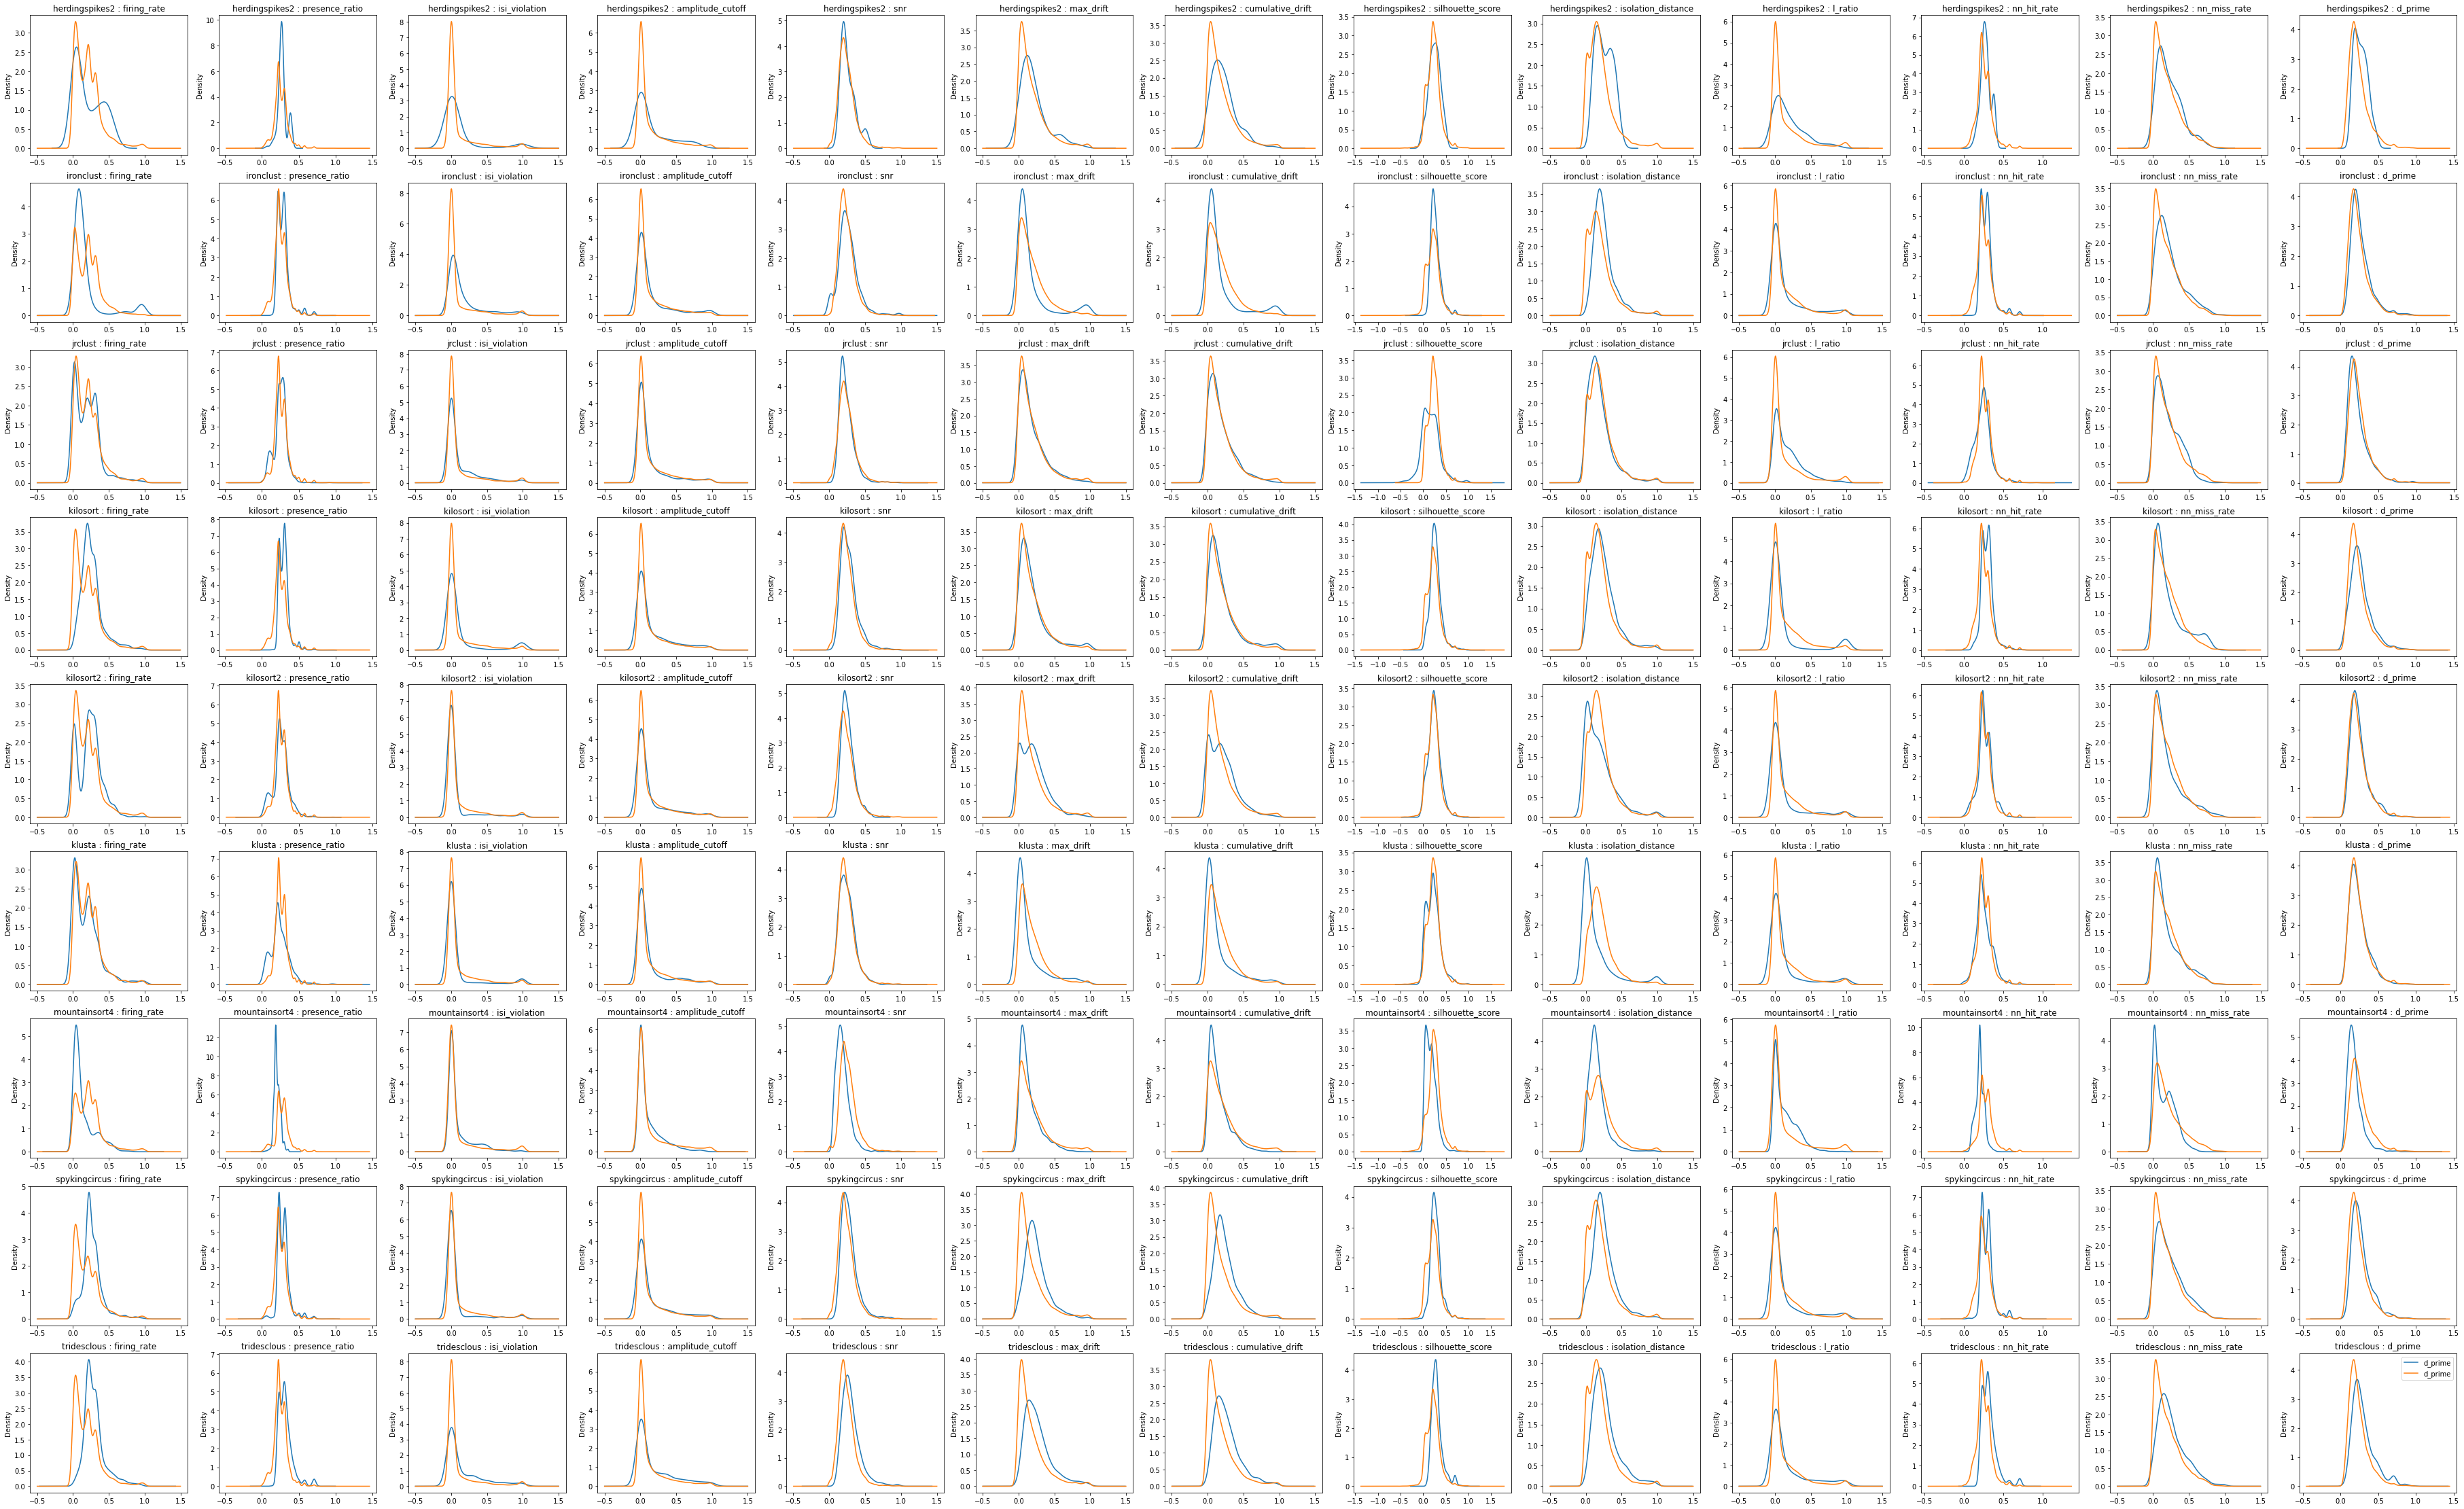

In [5]:
fig, axes = plt.subplots(nrows=len(SORTER_NAMES), ncols=len(METRIC_NAMES), squeeze=False, figsize=(64,40))

for i, sorter_name in enumerate(SORTER_NAMES):
    current_sorter = static_tetrode_metric_data[sorter_name]
    other_sorters = pd.concat(df for name, df in static_tetrode_metric_data.items() if name != sorter_name)

    current_sorter[METRIC_NAMES[0]].plot.kde(ax=axes[i][0], label=sorter_name)
    other_sorters[METRIC_NAMES[0]].plot.kde(ax=axes[i][0], label='Other sorters')
    axes[i][0].set_title(f'{sorter_name} : {METRIC_NAMES[0]}')
    for j, metric_name in enumerate(METRIC_NAMES[1:]):
        current_sorter[metric_name].plot.kde(ax=axes[i][j+1])
        other_sorters[metric_name].plot.kde(ax=axes[i][j+1])
        axes[i][j+1].set_title(f'{sorter_name} : {metric_name}')

plt.legend()


plt.savefig('kl_pvalues_scaled.pdf')